<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Pytorch_Logistic_regression_success_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('ex2data1.txt',header=None)

In [24]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [25]:
df.rename(columns={0: "First Exam"},inplace=True)
df.rename(columns={1: "Second Exam"},inplace=True)
df.rename(columns={2: "Result"},inplace=True)

In [26]:
df.head()

,First Exam,Second Exam,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [27]:
x = df.drop('Result',axis=1)
y = df['Result']

In [28]:
x = x.values
y = y.values

## Train and validation data preperation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=33)

In [30]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [31]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Simple Neural Network

In [32]:
class Model(nn.Module):
  def __init__(self,in_features,h1,h2,out_features):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [33]:
model = Model(2,8,9,2)

## Cost function and optimizer

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

## Training

In [35]:
epochs = 400
losses = []

for i in range(epochs):

  # forward and get a prediction
  y_pred = model.forward(X_train)
  # calculate loss/error
  loss = criterion(y_pred,y_train)
  losses.append(loss)
  if i%10==0:
    print('Epoch: {} and Loss: {}'.format(i,loss))
  #Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 6.551455497741699
Epoch: 10 and Loss: 0.7039526104927063
Epoch: 20 and Loss: 0.6587467193603516
Epoch: 30 and Loss: 0.6738351583480835
Epoch: 40 and Loss: 0.6477251052856445
Epoch: 50 and Loss: 0.6369984745979309
Epoch: 60 and Loss: 0.6281096935272217
Epoch: 70 and Loss: 0.6183034181594849
Epoch: 80 and Loss: 0.6082451939582825
Epoch: 90 and Loss: 0.5987141132354736
Epoch: 100 and Loss: 0.5881013870239258
Epoch: 110 and Loss: 0.57785564661026
Epoch: 120 and Loss: 0.5672894716262817
Epoch: 130 and Loss: 0.5569413900375366
Epoch: 140 and Loss: 0.5467216968536377
Epoch: 150 and Loss: 0.5369769930839539
Epoch: 160 and Loss: 0.5287214517593384
Epoch: 170 and Loss: 0.5208451747894287
Epoch: 180 and Loss: 0.5130530595779419
Epoch: 190 and Loss: 0.5051438808441162
Epoch: 200 and Loss: 0.4973791539669037
Epoch: 210 and Loss: 0.48980870842933655
Epoch: 220 and Loss: 0.4793056547641754
Epoch: 230 and Loss: 0.46995609998703003
Epoch: 240 and Loss: 0.45573729276657104
Epoch: 250 

## Visualization

Text(0.5, 0, 'Epoch')

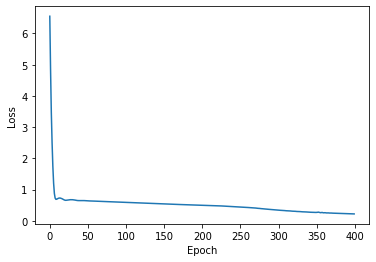

In [36]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [37]:
with torch.no_grad(): 
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [38]:
loss

tensor(0.1345)

## Evaluation

In [39]:
correct = 0
with torch.no_grad():

  for i,data in enumerate(X_test):

    y_val = model.forward(data)

    print('{}: {} belonging class: {}'.format(i+1,str(y_val),y_test[i]))

    if y_val.argmax().item() == y_test[i]:
      correct = correct + 1

print('We got {} number correct'.format(correct))

1: tensor([-2.9271,  3.0592]) belonging class: 1
2: tensor([-3.1783,  3.3102]) belonging class: 1
3: tensor([-0.9136,  1.0472]) belonging class: 1
4: tensor([-0.9299,  1.0634]) belonging class: 1
5: tensor([-2.3659,  2.4984]) belonging class: 1
6: tensor([-1.2040,  1.3373]) belonging class: 1
7: tensor([-1.8169,  1.9497]) belonging class: 1
8: tensor([-0.1776,  0.3116]) belonging class: 1
9: tensor([ 1.0538, -0.9189]) belonging class: 0
10: tensor([ 1.2897, -1.1546]) belonging class: 0
11: tensor([-0.0411,  0.1752]) belonging class: 1
12: tensor([ 1.2552, -1.1202]) belonging class: 0
13: tensor([-1.7811,  1.9140]) belonging class: 1
14: tensor([ 0.3406, -0.2062]) belonging class: 0
15: tensor([ 1.1137, -0.9788]) belonging class: 0
16: tensor([ 1.0694, -0.9345]) belonging class: 0
17: tensor([-2.1606,  2.2933]) belonging class: 1
18: tensor([ 0.8152, -0.6805]) belonging class: 0
19: tensor([-2.4894,  2.6218]) belonging class: 1
20: tensor([-2.6132,  2.7455]) belonging class: 1
We got 20